In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['VGT']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-15  102.51  102.65  100.43  100.54  427644    VGT
 2015-01-16  100.25  101.65  100.13  101.53  478660    VGT
 2015-01-20  102.18  102.55  101.00  102.29  781817    VGT
 2015-01-21  101.93  103.02  101.46  102.48  345814    VGT
 2015-01-22  102.97  104.50  101.95  104.42  580212    VGT
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  244.10  244.24  243.27  243.85  234601    VGT
 2019-12-26  244.32  245.73  244.32  245.73  301469    VGT
 2019-12-27  246.71  246.75  244.93  245.64  349465    VGT
 2019-12-30  245.50  245.63  242.10  244.18  507137    VGT
 2019-12-31  243.31  245.05  243.00  244.85  374332    VGT
 
 [1249 rows x 6 columns]]

In [4]:
vgt = data[0]
vgt.to_csv('vgt.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-15  102.51  102.65  100.43  100.54  427644    VGT
 2015-01-16  100.25  101.65  100.13  101.53  478660    VGT
 2015-01-20  102.18  102.55  101.00  102.29  781817    VGT
 2015-01-21  101.93  103.02  101.46  102.48  345814    VGT
 2015-01-22  102.97  104.50  101.95  104.42  580212    VGT
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  244.10  244.24  243.27  243.85  234601    VGT
 2019-12-26  244.32  245.73  244.32  245.73  301469    VGT
 2019-12-27  246.71  246.75  244.93  245.64  349465    VGT
 2019-12-30  245.50  245.63  242.10  244.18  507137    VGT
 2019-12-31  243.31  245.05  243.00  244.85  374332    VGT
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [10]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9292      0.047    -19.932      0.000      -1.021      -0.838
ar.L2         -0.0901      0.019     -4.836      0.000      -0.127      -0.054
ma.L1          0.1135      0.054      2.101      0.036       0.008       0.219
ma.L2         -1.1154      0.055    -20.342      0.000      -1.223      -1.008
ma.S.L5       -0.0802      0.021     -3.785      0.000      -0.122      -0.039
ma.S.L10       0.0238      0.019      1.234      0.217      -0.014       0.062
sigma2         2.5127      0.240     10.488      0.000       2.043       2.982


In [11]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('vgt_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.9292,0.047,-19.932,0.000,-1.021,-0.838
2,ar.L2,-0.0901,0.019,-4.836,0.000,-0.127,-0.054
3,ma.L1,0.1135,0.054,2.101,0.036,0.008,0.219
4,ma.L2,-1.1154,0.055,-20.342,0.000,-1.223,-1.008
5,ma.S.L5,-0.0802,0.021,-3.785,0.000,-0.122,-0.039
6,ma.S.L10,0.0238,0.019,1.234,0.217,-0.014,0.062
7,sigma2,2.5127,0.240,10.488,0.000,2.043,2.982


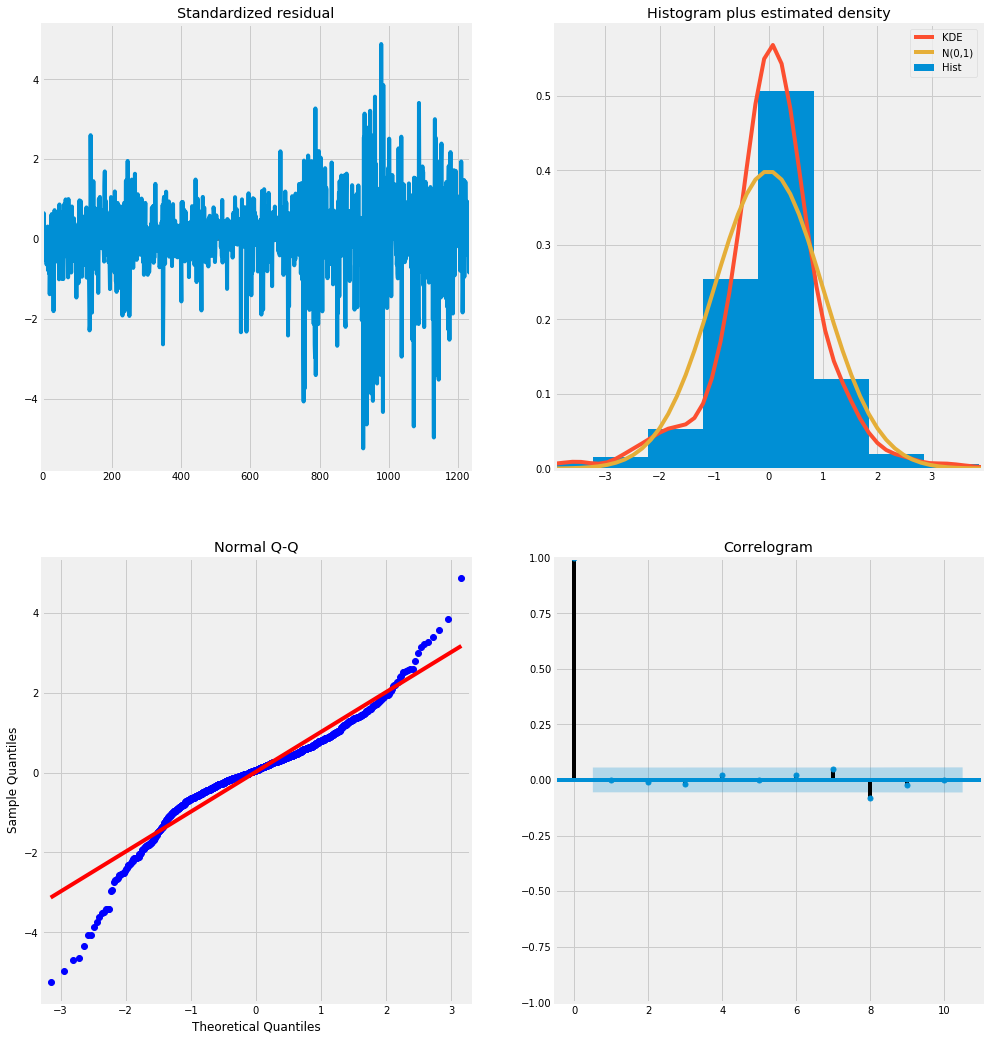

In [12]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('vgtoutput.png')
plt.show()

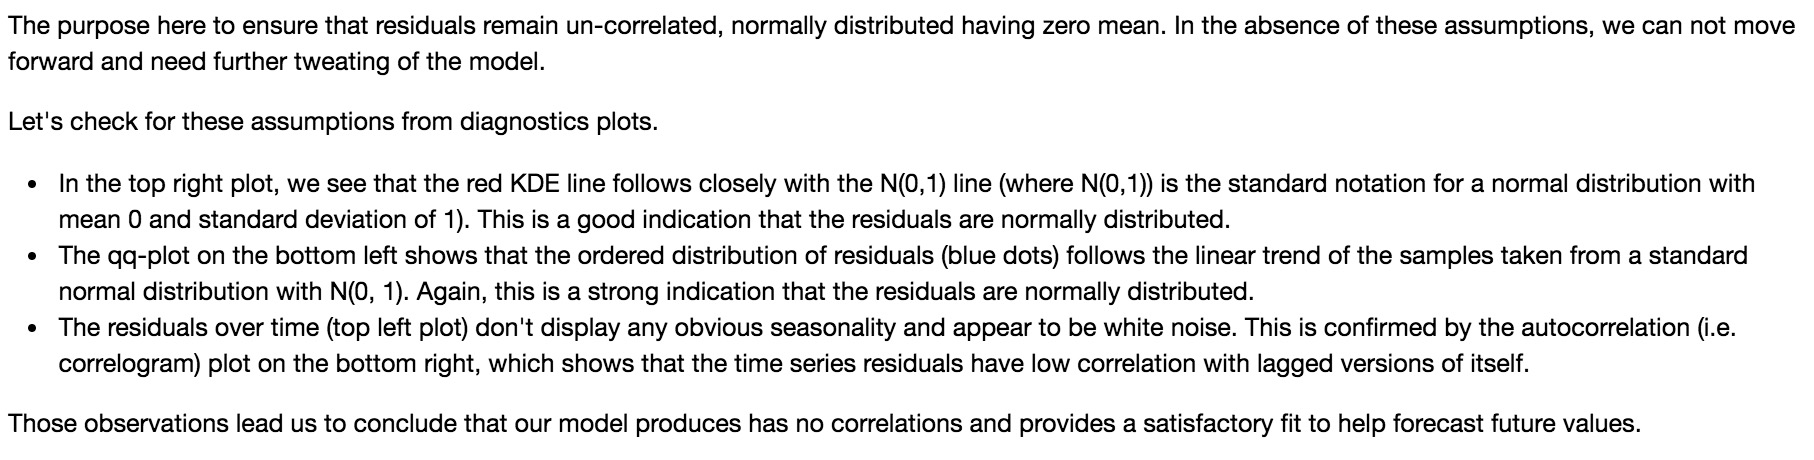

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [13]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

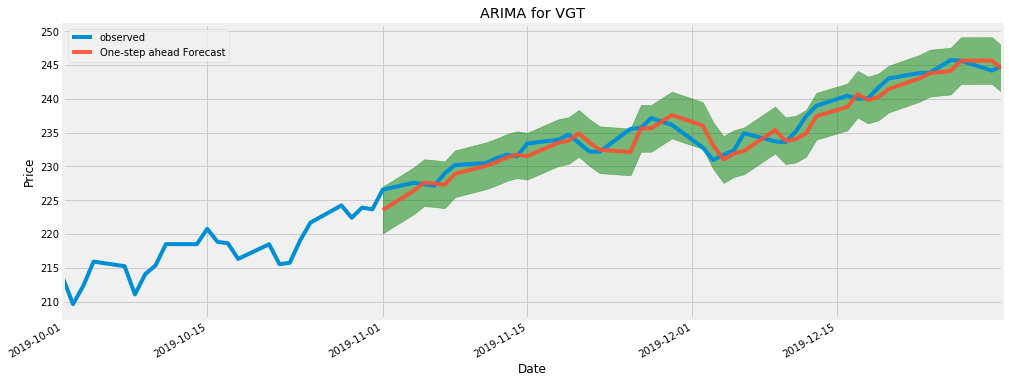

In [14]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for VGT')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('vgt_arima.png')
plt.show()

In [15]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.19


In [16]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

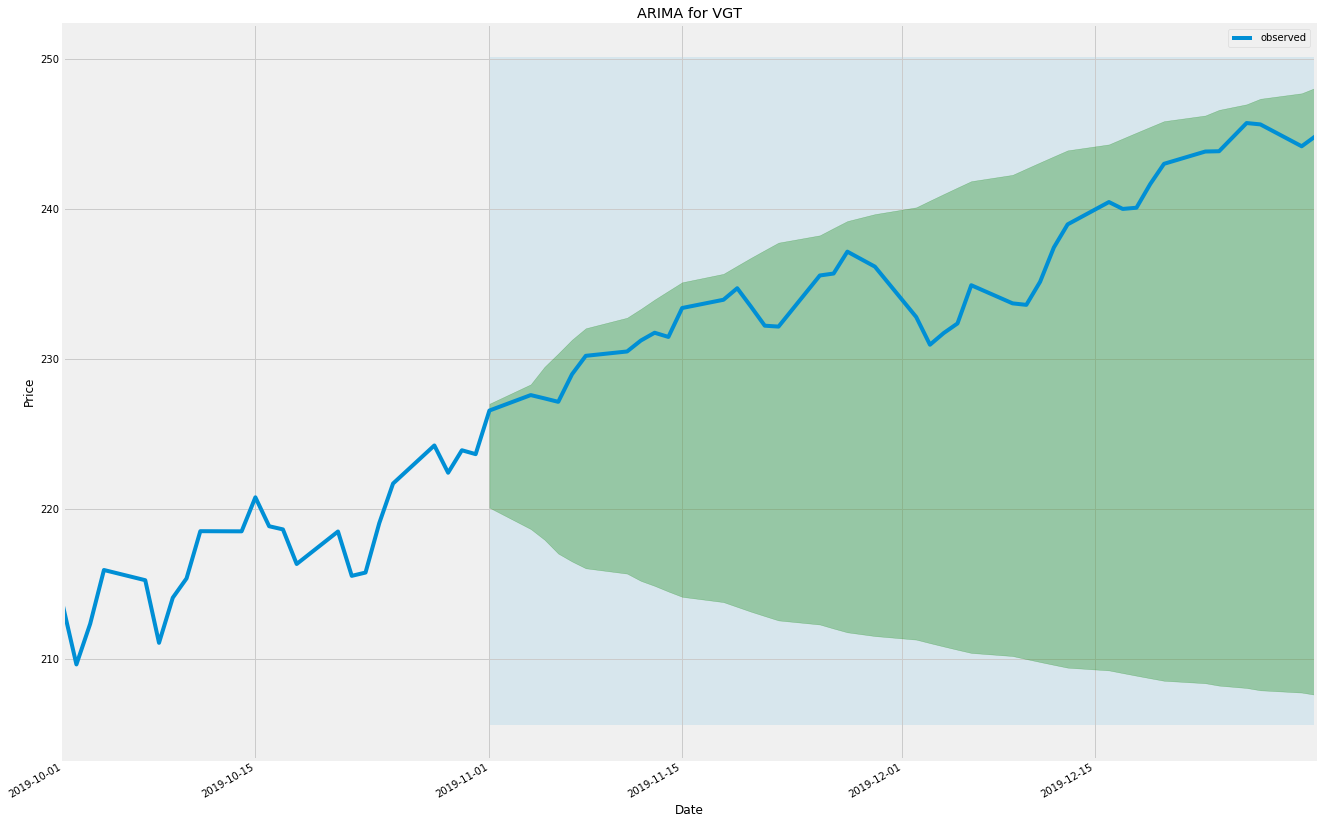

In [17]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for VGT')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('vgt_arima2.png')
plt.show()

In [18]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 113.14


In [19]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [20]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

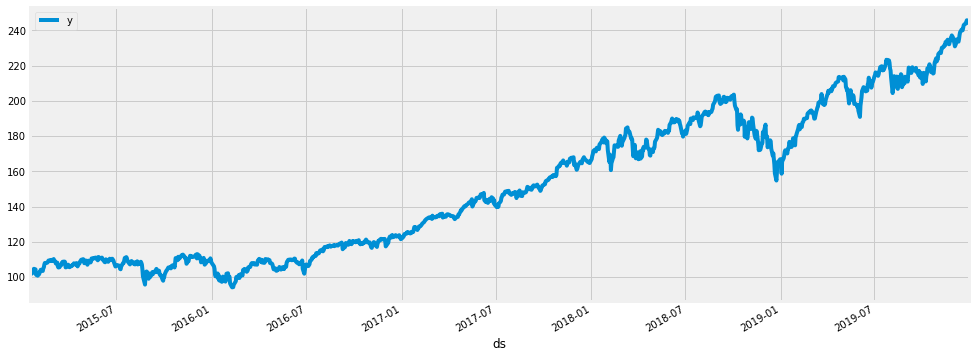

In [21]:
spy.set_index('ds').plot()

In [22]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [23]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [24]:
vgt_df_novjan = df.tail(71)
vgt_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [25]:
vgt_yf = pd.read_csv('VGT_yf.csv')
vgt_yf = vgt_yf.rename(columns={"Date": "ds"})
vgt_yf['ds'] = pd.to_datetime(vgt_yf['ds'])

vgt_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [26]:
vgt_yf1 = vgt_yf[['ds','Adj Close']]
vgt_yf1

,ds,Adj Close
0,2019-11-01,225.932846
1,2019-11-04,226.960037
2,2019-11-05,226.740631
3,2019-11-06,226.511261
4,2019-11-07,228.346252
5,2019-11-08,229.572891
6,2019-11-11,229.862106
7,2019-11-12,230.590118
8,2019-11-13,231.108704
9,2019-11-14,230.829468


In [27]:
comb = vgt_df_novjan.join(vgt_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,231.685385,223.306485,239.776582,233.302704,1.617319,0.69%
1220,2019-11-19,231.927177,223.405166,239.583855,234.070618,2.143441,0.92%
1221,2019-11-20,232.034670,223.689285,240.129500,232.843964,0.809294,0.35%
1222,2019-11-21,232.193686,224.306154,240.155221,231.577423,-0.616263,-0.27%
1223,2019-11-22,232.271735,224.051103,240.368165,231.517578,-0.754157,-0.33%
1224,2019-11-25,232.485610,224.381528,240.080685,234.918289,2.432679,1.04%
1225,2019-11-26,232.762295,224.355914,241.614408,235.047943,2.285648,0.97%
1226,2019-11-27,232.915979,224.986576,240.811400,236.503952,3.587973,1.52%
1227,2019-11-29,233.269594,225.557459,241.440704,235.506683,2.237089,0.95%
1228,2019-12-02,233.677608,225.203715,242.249836,232.155838,-1.521770,-0.66%


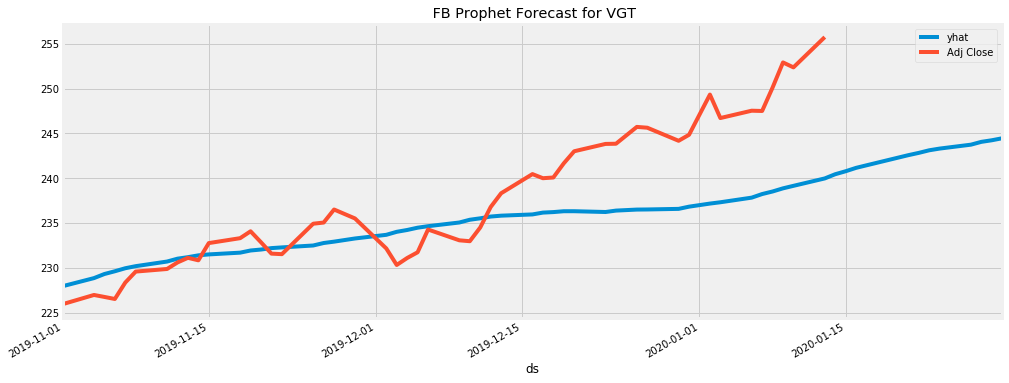

In [28]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for VGT')
plt.savefig('vgt_fbproph_forecast.png')

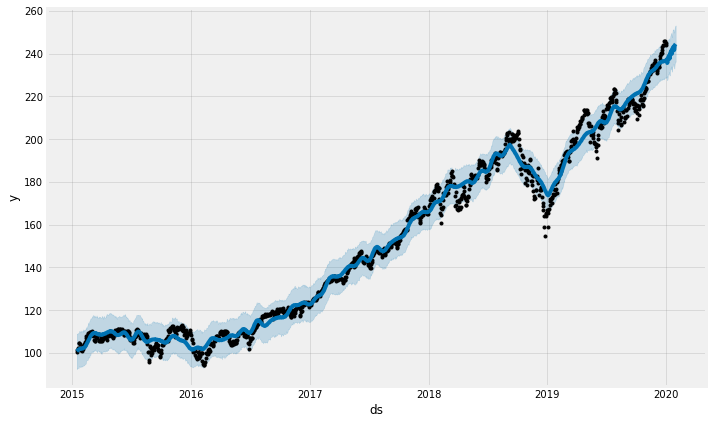

In [29]:
p.plot(df)
plt.savefig('vgt_fbp2.png')

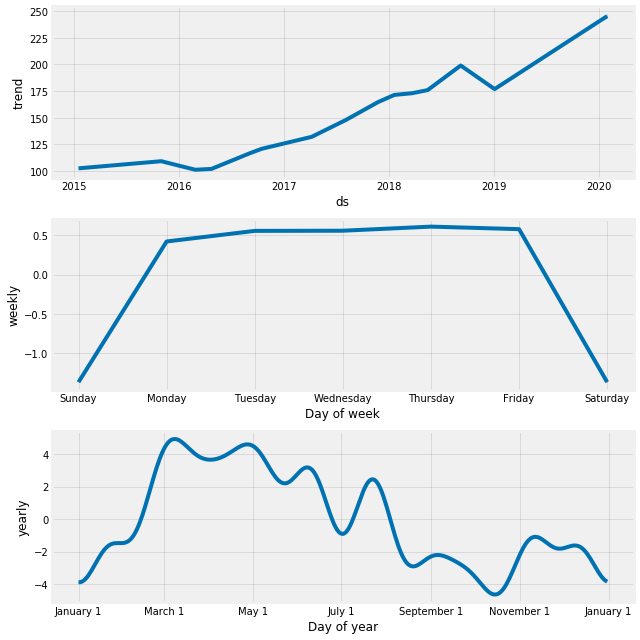

In [30]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('vgt_seasonality.png')

In [31]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [32]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,226.925797
2019-12-02,230.390770
2019-12-03,230.609234
2019-12-04,230.687882
2019-12-05,230.702733
2019-12-06,230.629647
2019-12-07,227.016179
2019-12-08,226.970378
2019-12-09,230.318432
